# 第八次作业：将木星也视作另一个太阳，计算地球所受的辐照强度，换算成温度

In [ ]:
from vpython import *
scene.forward = vector(0,-.5,1)
scene.width=1280
scene.height=720
G = 6.672e-11#万有引力常数
body1 = sphere(pos=vector(2e11,0,2e11), radius=2e10, color=color.red, 
                make_trail=True, interval=10, retain=50)
body1.mass = 4.001e30#质量
body1.p = vector(0, 2e4, 0) * body1.mass#动量
body2 = sphere(pos=vector(-1.3e11,(3**0.5)*1e11,0), radius=1e10, color=color.blue,
                make_trail=True, interval=10, retain=50)
body2.mass = 2e30
body2.p = vector(-(3**0.5)*1e4,-1e4, -0.4e4) * body2.mass
body3 = sphere(pos=vector(-1e11,3e11,-1e11), radius=3e10, color=color.yellow,
                make_trail=True, interval=10, retain=50)
body3.mass = 6e30
body3.p = -body1.p-body2.p;#保证整体动量为0，防止球飞到屏外
dt = 1e1#物理帧间隔
while True:
    rate(1000)
    
    r1 = body2.pos - body1.pos
    F1 = G * body1.mass * body2.mass * r1.hat / mag2(r1)#万有引力定律
    
    r2 = body2.pos - body3.pos
    F2 = G * body2.mass * body3.mass * r2.hat / mag2(r2)
    
    r3 = body1.pos - body3.pos
    F3 = G * body1.mass * body3.mass * r3.hat / mag2(r3)
    
    body1.p = body1.p + F1*dt - F3*dt#动量定理
    body2.p = body2.p - F1*dt - F2*dt
    body3.p = body3.p + F2*dt + F3*dt
    
    body1.pos = body1.pos + (body1.p/body1.mass) * dt
    body2.pos = body2.pos + (body2.p/body2.mass) * dt
    body3.pos = body3.pos + (body3.p/body3.mass) * dt

## Sun and Jupiter and Earth three_bodies_moudle

In [22]:
#Import scipy
import scipy as sci

#Import matplotlib and associated modules for 3D andanimations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2

#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=7.79e+12 #m #distance between stars in Sun and Jupiter
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.8*365*24*3600*0.51 #s #orbital period of Alpha Centauri

#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd
#Define masses
m1=1 #Sun质量比
m2=1 #Jupiter质量比
m3= 0.5#Third Star#Mass of the Third Star

#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m
r3=[0,1,0] #m

#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")
r3=sci.array(r3,dtype="float64")

#Find Centre of Mass
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)

#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
v3=[0,-0.01,0] #m/s

#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")
v3=sci.array(v3,dtype="float64")

#Find velocity of COM
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

#A function defining the equations of motion
def ThreeBodyEquations(w,t,G,m1,m2,m3):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]

    r12=sci.linalg.norm(r2-r1)
    r13=sci.linalg.norm(r3-r1)
    r23=sci.linalg.norm(r3-r2)
   
    dv1bydt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2bydt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3bydt=K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3

    r12_derivs=sci.concatenate((dr1bydt,dr2bydt))
    r_derivs=sci.concatenate((r12_derivs,dr3bydt))
    v12_derivs=sci.concatenate((dv1bydt,dv2bydt))
    v_derivs=sci.concatenate((v12_derivs,dv3bydt))
    derivs=sci.concatenate((r_derivs,v_derivs))
    return derivs


/tmp/ipykernel_975/3155447444.py:32: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r1=sci.array(r1,dtype="float64")
/tmp/ipykernel_975/3155447444.py:33: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r2=sci.array(r2,dtype="float64")
/tmp/ipykernel_975/3155447444.py:34: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r3=sci.array(r3,dtype="float64")
/tmp/ipykernel_975/3155447444.py:45: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v1=sci.array(v1,dtype="float64")
/tmp/ipykernel_975/3155447444.py:46: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v2=sci.array(v2,dtype="float64")
/tmp/ipykernel_975/3155447444.py:47: DeprecationWarning: scipy.array is deprecated and will be removed in SciP

/tmp/ipykernel_975/670511778.py:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  init_params=sci.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
/tmp/ipykernel_975/670511778.py:4: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  time_span=sci.linspace(0,20,500) #20 orbital periods and 500 points
/tmp/ipykernel_975/3155447444.py:72: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  r12_derivs=sci.concatenate((dr1bydt,dr2bydt))
/tmp/ipykernel_975/3155447444.py:73: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  r_derivs=sci.concatenate((r12_derivs,dr3bydt))
/tmp/ipykernel_975/3155447444.py:74: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  v12_derivs=sc

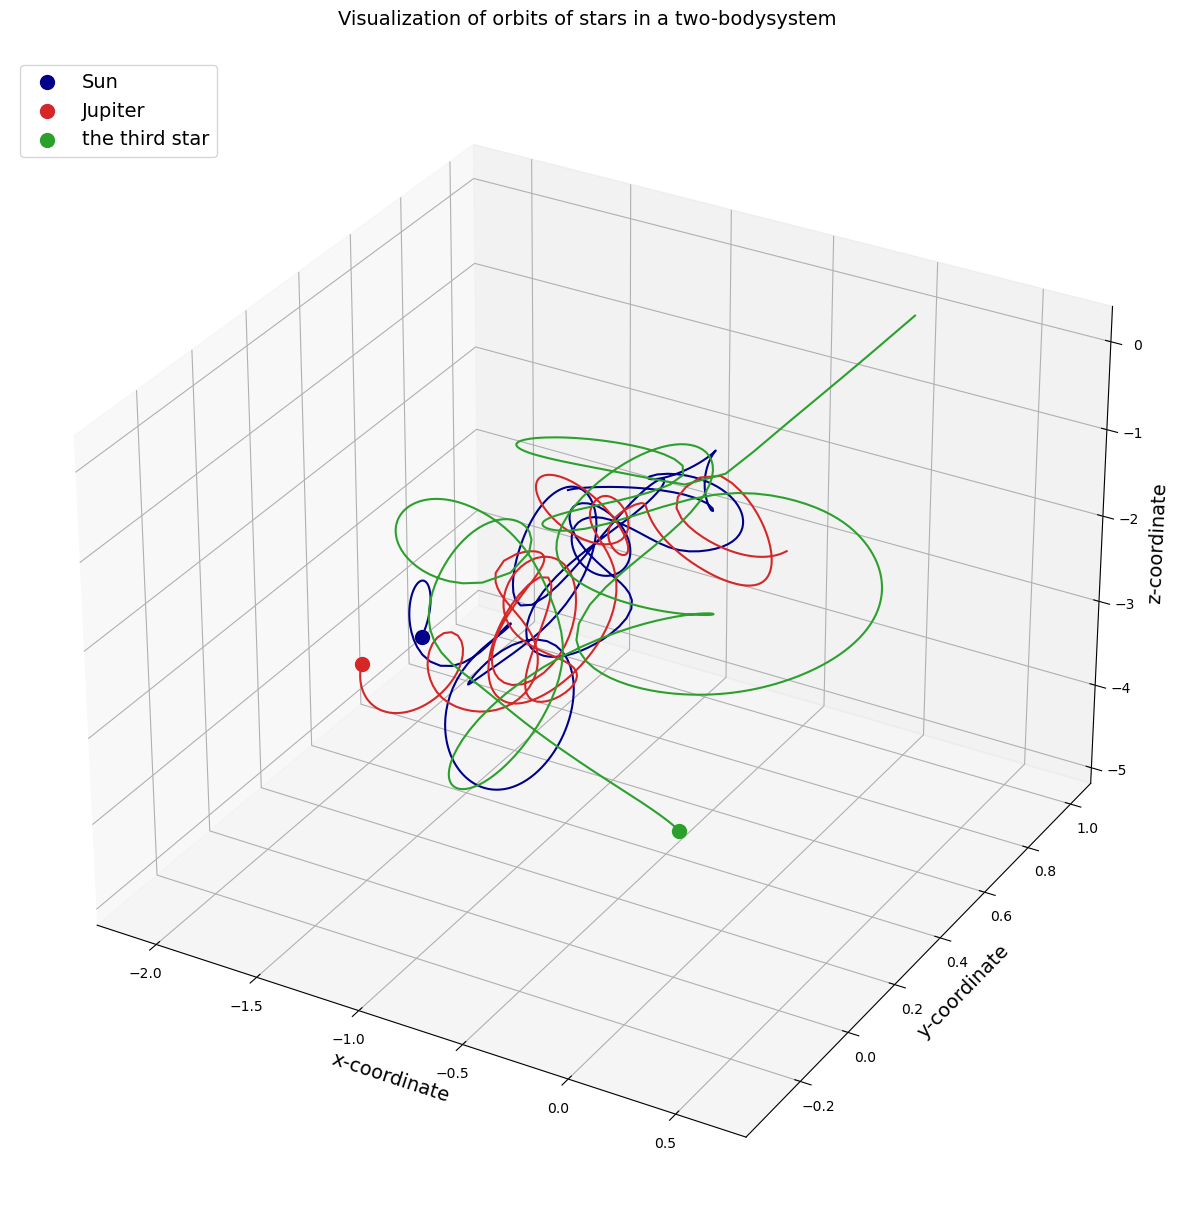

In [23]:
#Package initial parameters
init_params=sci.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
time_span=sci.linspace(0,20,500) #20 orbital periods and 500 points

#Run the ODE solver
import scipy.integrate

three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m1,m2,m3))
r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

#Create figure
fig=plt.figure(figsize=(15,15))

#Create 3D axes
ax=fig.add_subplot(111,projection="3d")

#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
ax.plot(r3_sol[:,0],r3_sol[:,1],r3_sol[:,2],color="tab:green")

#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Sun")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Jupiter")
ax.scatter(r3_sol[-1,0],r3_sol[-1,1],r3_sol[-1,2],color="tab:green",marker="o",s=100,label="the third star")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-bodysystem\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

## 太阳辐射强度$$\frac {{T}_{sun}^{2}}{{T}_{Earth}^{2}}=\sqrt{\frac{{R}_{Sun}}{2D}}\\
{L}_{1}=4pi{R}_{Sun}^{2}\sigma {T}_{sun}^{2}\\{L}_{2}=4pi{R}_{Earth}^{2}\sigma {T}_{Earth}^{2}$$
R_sun=7e8
D=1.5e11
T_sun=5800
T_earth=280

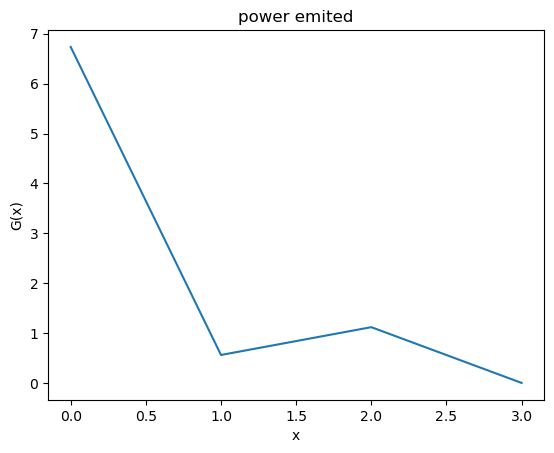

In [46]:
G=[]
G_0=1368
r_0=1.49e6
for i in range(-1,3):
    G.append(sqrt((r1_sol[i,i]**2+r3_sol[i,i]**2)/(r_0))*G_0)

plt.figure(2)
plt.xlabel('x')
plt.ylabel('G(x)')
plt.title('power emited')
plt.plot(G)
plt.show()

## 补充：上次作业 按照课本数据的复现（还没上过量力。。借到了课本）

In [1]:
from math import *
#import numpy as np
#利用公式(7.2)和(7.3)计算量子力学里面有限深方势阱的能级，最好能够复现量子力学课本上的计算结果，即不同参数条件下都能把能级找到。
#设置物理学常量
'''
a=float(input('请输入势阱宽度'))
V=float(input('请输入势阱深度'))
m=float(input('请输入粒子质量'))
hbar=6.62607015*10**(-34)/(2*np.pi)
'''
a=1
V=32
m=1
hbar=1
z0=a/hbar*sqrt(2*m*V)
eps=1e-6 #设置精度误差范围
def even(x):
    return tan(x)-sqrt((z0/x)**2-1)
def odd(x):
    return tanh(x)+sqrt((z0/x)**2-1)
#定义寻找根函数
def even_root(xminus,xplus,Nmax,eps):
    for i in range(Nmax):
        x=(xplus+xminus)/2
        if (even(xplus)*even(x)<0):
            xminus=x
        else:
            xplus=x
        if (abs(even(x))<eps):
            break
        if i==Nmax-1:
           print(" \n Root NOT found a f t e r Nmax i t e r a t i o n s \n")
    return x
def odd_root(xminus,xplus,Nmax,eps):
    for i in range(Nmax):
        x=(xplus+xminus)/2
        if (odd(xplus)*odd(x)<0):
            xminus=x
        else:
            xplus=x
        if (abs(odd(x))<eps):
            break
        if i==Nmax-1:
           print(" \n Root NOT found a f t e r Nmax i t e r a t i o n s \n")
    return x
#计算奇，偶函数能级
imax=100
evenx=int(z0//pi)
x=[i*pi for i in range(evenx+1)]
E_even=[]
E_odd=[]
#计算偶函数能级
for i in range(len(x)-1):
    t1=even_root(x[i],x[i+1],imax,eps)
    Efinal=(t1**2)*(hbar**2)/(2*m*a**2)-V
    E_even.append(Efinal)
#计算奇函数能级
for i in range(len(x)-1):
    t2=odd_root(x[i],x[i+1],imax,eps)
    Efinal1=(t2**2)*(hbar**2)/(2*m*a**2)-V
    E_odd.append(Efinal1)
print('波函数为偶函数能级：')
print(E_even)
print('波函数为奇函数能级')
print(E_odd)

 
 Root NOT found a f t e r Nmax i t e r a t i o n s 

 
 Root NOT found a f t e r Nmax i t e r a t i o n s 

 
 Root NOT found a f t e r Nmax i t e r a t i o n s 

 
 Root NOT found a f t e r Nmax i t e r a t i o n s 

波函数为偶函数能级：
[-30.76629944986383, -20.896695048774472]
波函数为奇函数能级
[-32.0, -27.06519779945532]
